# COGS 108 - Final Project 

# Overview

###  In this research, I will look for if the number of parks will have positive effect on the medium price of house in that area. The basic unit of area in my research is the zipcode area.

### I found that there are no or a little bit negative correlation between the number of parks and the medium price of house in that area. So this research proofed that we should not buy a house by only considering if there is lots of parks around. 


# Name & GitHub ID

- Name: Chenhao Zhu
- GitHub Username: chzhu2000

# Research Question

### Is there any correlation between the medium house price and the number of parks  in an zip code area?


## Background and Prior Work

*Fill in your background and prior work here* 
### Living in an area with lots of parks and recreation will be an ideal living environment. I am very interesting in the housing market in San Diego and find a house with great value is very crutial. There are some research papers which discusses the relationship between the parks and housing price. Some of them believe that there are very positive correlation between the parks and Housing price, but some of them shows no correlation and even negative correlation.  In the article by Robert Caston, he claims that a park adds a significant increase in home prices. A home adjacent to or fronting a passive park will see a 20% increase in value on average and Inner city homes within a quarter mile of a park have an increased value of 10% on average. This seems that the increase in the number of parks will reduce the distance between house and park which should make the house more valuable. However,  in the paper "How Much Impact Do Parks Have on Property Values?", the author claims that it is not certain that parks will increase property Values. The property Values will depend on the park quality. 


References (include links):
- 1) https://www.redfin.com/news/data-center/ 
- 2) https://www.theparkcatalog.com/blog/parks-homes-values/
- 3) https://www.nrpa.org/parks-recreation-magazine/2020/april/how-much-impact-do-parks-have-on-property-values/


# Hypothesis


### There is a positive correlation between the number of parks and recreations and the medium of housing price in a certain area. 

# Dataset(s)

*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name: Yelp Data for San Diego Parks
- Link to the dataset:  https://www.yelp.com/  
- Number of observations:833

- Dataset Name: Redfin Home Prices, Sales & Inventory
- Link to the dataset:  https://www.redfin.com/news/data-center/ 
- Number of observations:10922


### The first data set is from Yelp Data. It has the data of the parks and recreations name in San Diego, the zipcode location, and phone number of the park. I will use this dataset to see the number of parks in one zipcode area. 


### The second dataset is from Redfin, it has the data of medium housing price from 2013 till now in every area in San Diego separated by zip codes. So I will use this dataset to find the medium house price in certain area in San Diego. 

### I will merge the two data sets by using the the Address as the common factor and use left merge to get the new dataset. The new dataset will be named result and will have variables of Address, Counts(number of park), and medium price of the house in 2019 May.


# Setup

Include all datasets and import all packages needed

In [1]:
# Imports all packages needed
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest




In [2]:
#Here is the first data set named df
df = pd.read_csv('/Users/jasonzhu/Downloads/individual_fa20-master 3/data/yelp_SD_parks.csv')
df


,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False
...,...,...,...,...,...,...,...,...,...,...
828,Del Cerro - San Diego,"San Diego, CA 92120",1.619287e+10,ggbc59hSsl6pxCGSN1QLQA,https://www.yelp.com/biz/del-cerro-san-diego-s...,4.5,12,-117.073524,32.792626,False
829,San Diego Metropolitan Transit System,"1255 Imperial Ave Ste 1000 San Diego, CA 92101",1.619238e+10,c8jhIMcwSjWqBD7S-faKYg,https://www.yelp.com/biz/san-diego-metropolita...,2.5,268,-117.153400,32.705760,False
830,Petco Park,"100 Park Blvd San Diego, CA 92101",1.619796e+10,HkgSbRLVMRHExsRkImIK5A,https://www.yelp.com/biz/petco-park-san-diego?...,4.0,1667,-117.157054,32.707246,False
831,Ann D. L'Heureux Memorial Dog Park,"2700 Carlsbad Village Dr Carlsbad, CA 92008",1.760434e+10,wYGJ65iVMi74-3TylWxY0Q,https://www.yelp.com/biz/ann-d-l-heureux-memor...,3.0,50,-117.316419,33.171137,False


In [3]:
#Here is the second data set named df2
df2 = pd.read_csv('/Users/jasonzhu/Downloads/housing_zip5.csv')
df2

,Region,Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Mar000et,Days on Mar000et MoM,Days on Mar000et YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,Zip Code: 91901,2012.2,385000,-1.3%,6.4%,63,6.8%,53.7%,61.0,1.7%,-19.7%,76.0,1.3%,-20.0%,59,-3.0,-25,97.8%,0.1%,0.4%
1,Zip Code: 91901,2012.3,385000,0.0%,-1.3%,50,-20.6%,2.0%,79.0,29.5%,2.6%,73.0,-3.9%,-17.0%,59,-1.0,2,97.2%,-0.6%,-1.4%
2,Zip Code: 91901,2012.4,375000,-2.6%,-13.1%,67,34.0%,15.5%,88.0,11.4%,22.2%,77.0,5.5%,-15.4%,47,-12.0,-6,97.6%,0.4%,-0.2%
3,Zip Code: 91901,2012.5,372000,-0.7%,-8.7%,60,-10.4%,7.1%,91.0,3.4%,18.2%,76.0,-1.3%,-24.0%,63,16.0,13,97.7%,0.1%,0.2%
4,Zip Code: 91901,2012.6,347000,-7.0%,-18.5%,64,6.7%,25.5%,79.0,-13.2%,2.6%,70.0,-7.9%,-23.9%,35,-28.0,-48,98.7%,1.0%,3.2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10917,Zip Code: 92197,2020.6,720000,0.0%,4.5%,9,28.6%,-30.8%,12.0,-7.7%,-7.7%,5.0,25.0%,0.0%,14,3.0,-6,98.1%,-0.3%,-0.4%
10918,Zip Code: 92197,2020.7,730000,1.4%,7.4%,13,44.4%,0.0%,17.0,41.7%,-15.0%,4.0,-20.0%,-42.9%,11,-3.0,-3,100.1%,2.0%,1.4%
10919,Zip Code: 92197,2020.8,736000,0.8%,5.4%,17,30.8%,30.8%,21.0,23.5%,16.7%,5.0,25.0%,0.0%,11,0.0,-1,101.1%,1.1%,1.4%
10920,Zip Code: 92197,2020.9,744000,1.1%,4.0%,21,23.5%,23.5%,21.0,0.0%,16.7%,4.0,-20.0%,-20.0%,10,-1.0,-2,100.9%,-0.2%,0.6%


# Data Cleaning

Describe your data cleaning steps here.

### 1. Clean the First data set the park named df

#### 1.1 dropping the rows which is_closed is true to get rid of the closing parks.

In [4]:
indexNames = df[ df['is_closed'] == True ].index
df.drop(indexNames , inplace=True)

#check df
df

,name,address,phone,id,url,rating,review_count,longitude,latitude,is_closed
0,Balboa Park,"1549 El Prado San Diego, CA 92101",1.619239e+10,9M_FW_-Ipx93I36w-_ykBg,https://www.yelp.com/biz/balboa-park-san-diego...,5.0,2105,-117.153150,32.734502,False
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",NaN,3AEHjqNrTmggA6G9VdhQfg,https://www.yelp.com/biz/civita-park-san-diego...,4.5,46,-117.147278,32.778315,False
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",1.619233e+10,3unbJeYrn1RmInZGmjp80g,https://www.yelp.com/biz/waterfront-park-san-d...,4.5,242,-117.172479,32.721952,False
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",NaN,PvHxIYrmaiFKdWUDTMDzcg,https://www.yelp.com/biz/trolley-barn-park-san...,4.5,102,-117.143789,32.762463,False
4,Bay View Park,"413 1st St Coronado, CA 92118",NaN,6IF4VB9-fkv_F-LBvG8ppQ,https://www.yelp.com/biz/bay-view-park-coronad...,5.0,42,-117.178967,32.701785,False
...,...,...,...,...,...,...,...,...,...,...
828,Del Cerro - San Diego,"San Diego, CA 92120",1.619287e+10,ggbc59hSsl6pxCGSN1QLQA,https://www.yelp.com/biz/del-cerro-san-diego-s...,4.5,12,-117.073524,32.792626,False
829,San Diego Metropolitan Transit System,"1255 Imperial Ave Ste 1000 San Diego, CA 92101",1.619238e+10,c8jhIMcwSjWqBD7S-faKYg,https://www.yelp.com/biz/san-diego-metropolita...,2.5,268,-117.153400,32.705760,False
830,Petco Park,"100 Park Blvd San Diego, CA 92101",1.619796e+10,HkgSbRLVMRHExsRkImIK5A,https://www.yelp.com/biz/petco-park-san-diego?...,4.0,1667,-117.157054,32.707246,False
831,Ann D. L'Heureux Memorial Dog Park,"2700 Carlsbad Village Dr Carlsbad, CA 92008",1.760434e+10,wYGJ65iVMi74-3TylWxY0Q,https://www.yelp.com/biz/ann-d-l-heureux-memor...,3.0,50,-117.316419,33.171137,False


#### 1.2 clean the column to only useful column in this one, I only need the park name and address

In [5]:
df = df.drop(['phone', 'id','url','rating','review_count','longitude','latitude','is_closed'], axis=1)
df

,name,address
0,Balboa Park,"1549 El Prado San Diego, CA 92101"
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108"
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101"
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116"
4,Bay View Park,"413 1st St Coronado, CA 92118"
...,...,...
828,Del Cerro - San Diego,"San Diego, CA 92120"
829,San Diego Metropolitan Transit System,"1255 Imperial Ave Ste 1000 San Diego, CA 92101"
830,Petco Park,"100 Park Blvd San Diego, CA 92101"
831,Ann D. L'Heureux Memorial Dog Park,"2700 Carlsbad Village Dr Carlsbad, CA 92008"


#### 1.3 clean the address to only zip code. Since I only need the zip code.

In [6]:
#only need the zipcode part which is the last five digits
df['address'] = df['address'].str.strip().str[-5:]

#check unique of zipcode
df['address'].unique()


array(['92101', '92108', '92116', '92118', '92123', '92110', '92109',
       '92117', '92111', '92130', '92107', '92129', '92131', '92119',
       '92120', '92106', '92104', '92037', '92127', '92124', '92126',
       '92122', '92075', '92103', '92182', '92102', '92078', '91942',
       '91915', '92624', '92071', '92029', '92064', '92074', '92021',
       '92024', '91932', '92136', '92139', '92040', '91945', '91977',
       '91902', '92026', '92121', '92115', '92105', '92113', '91910',
       '92707', '92171', '92114', '91010', '91950', '92014', '90717',
       'o, CA', '92011', '92065', '92058', '92033', '91941', '92154',
       '92039', '92093', '92166', '92007', '92173', '92025', '90815',
       'exico', '92083', '92084', '92008', '92879', '92054', '92020',
       '92627', '92649', '91302', '92132', '91913', '92321', '90069',
       '92128', '92172', '91914', '92835', '92661', '91911', '92626',
       '92027', '90670', '92630', '92145', '92135', '92009', '92038',
       '92057', '920

In [7]:
#Since there is 0,CA in the zipcode array, I need to get rid of address without zipcode
x = df[ df['address'] == 'o, CA' ].index
df.drop(x , inplace=True)

#Check the address column to see if it is unique 
df['address'].unique()

array(['92101', '92108', '92116', '92118', '92123', '92110', '92109',
       '92117', '92111', '92130', '92107', '92129', '92131', '92119',
       '92120', '92106', '92104', '92037', '92127', '92124', '92126',
       '92122', '92075', '92103', '92182', '92102', '92078', '91942',
       '91915', '92624', '92071', '92029', '92064', '92074', '92021',
       '92024', '91932', '92136', '92139', '92040', '91945', '91977',
       '91902', '92026', '92121', '92115', '92105', '92113', '91910',
       '92707', '92171', '92114', '91010', '91950', '92014', '90717',
       '92011', '92065', '92058', '92033', '91941', '92154', '92039',
       '92093', '92166', '92007', '92173', '92025', '90815', 'exico',
       '92083', '92084', '92008', '92879', '92054', '92020', '92627',
       '92649', '91302', '92132', '91913', '92321', '90069', '92128',
       '92172', '91914', '92835', '92661', '91911', '92626', '92027',
       '90670', '92630', '92145', '92135', '92009', '92038', '92057',
       '92023', '919

#### 1.4 count the number of park in each zipcode

In [8]:
df = df['address'].value_counts().rename_axis('address').to_frame('counts')
df

,counts
address,
92101,127
92037,42
92104,41
92109,35
92130,30
...,...
92132,1
91913,1
90069,1


#### 1.5 Reset the index of dataframe

In [9]:
df = df.reset_index()
df

,address,counts
0,92101,127
1,92037,42
2,92104,41
3,92109,35
4,92130,30
...,...,...
100,92132,1
101,91913,1
102,90069,1
103,92136,1


#### 1.6 Change the address data into numerical form

In [10]:
df['address'] = pd.to_numeric(df['address'], errors='coerce')
df['address']

0      92101.0
1      92037.0
2      92104.0
3      92109.0
4      92130.0
        ...   
100    92132.0
101    91913.0
102    90069.0
103    92136.0
104    92028.0
Name: address, Length: 105, dtype: float64

#### 1.7 Final Check of the data set df

In [11]:

df

,address,counts
0,92101.0,127
1,92037.0,42
2,92104.0,41
3,92109.0,35
4,92130.0,30
...,...,...
100,92132.0,1
101,91913.0,1
102,90069.0,1
103,92136.0,1


### 2. Clean the second data set

In [12]:
df2

,Region,Period End,Median Sale Price,Median Sale Price MoM,Median Sale Price YoY,Homes Sold,Homes Sold MoM,Homes Sold YoY,New Listings,New Listings MoM,New Listings YoY,Inventory,Inventory MoM,Inventory YoY,Days on Mar000et,Days on Mar000et MoM,Days on Mar000et YoY,Average Sale To List,Average Sale To List MoM,Average Sale To List YoY
0,Zip Code: 91901,2012.2,385000,-1.3%,6.4%,63,6.8%,53.7%,61.0,1.7%,-19.7%,76.0,1.3%,-20.0%,59,-3.0,-25,97.8%,0.1%,0.4%
1,Zip Code: 91901,2012.3,385000,0.0%,-1.3%,50,-20.6%,2.0%,79.0,29.5%,2.6%,73.0,-3.9%,-17.0%,59,-1.0,2,97.2%,-0.6%,-1.4%
2,Zip Code: 91901,2012.4,375000,-2.6%,-13.1%,67,34.0%,15.5%,88.0,11.4%,22.2%,77.0,5.5%,-15.4%,47,-12.0,-6,97.6%,0.4%,-0.2%
3,Zip Code: 91901,2012.5,372000,-0.7%,-8.7%,60,-10.4%,7.1%,91.0,3.4%,18.2%,76.0,-1.3%,-24.0%,63,16.0,13,97.7%,0.1%,0.2%
4,Zip Code: 91901,2012.6,347000,-7.0%,-18.5%,64,6.7%,25.5%,79.0,-13.2%,2.6%,70.0,-7.9%,-23.9%,35,-28.0,-48,98.7%,1.0%,3.2%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10917,Zip Code: 92197,2020.6,720000,0.0%,4.5%,9,28.6%,-30.8%,12.0,-7.7%,-7.7%,5.0,25.0%,0.0%,14,3.0,-6,98.1%,-0.3%,-0.4%
10918,Zip Code: 92197,2020.7,730000,1.4%,7.4%,13,44.4%,0.0%,17.0,41.7%,-15.0%,4.0,-20.0%,-42.9%,11,-3.0,-3,100.1%,2.0%,1.4%
10919,Zip Code: 92197,2020.8,736000,0.8%,5.4%,17,30.8%,30.8%,21.0,23.5%,16.7%,5.0,25.0%,0.0%,11,0.0,-1,101.1%,1.1%,1.4%
10920,Zip Code: 92197,2020.9,744000,1.1%,4.0%,21,23.5%,23.5%,21.0,0.0%,16.7%,4.0,-20.0%,-20.0%,10,-1.0,-2,100.9%,-0.2%,0.6%


#### 2.1 Clean the data in region to pure zipcode

In [13]:
#Since all of the zip code is in last five digits
df2['Region'] = df2['Region'].str.strip().str[-5:]
df2

#check uniqueness
df2['Region'].unique()

array(['91901', '91902', '91905', '91906', '91908', '91910', '91911',
       '91912', '91913', '91914', '91915', '91916', '91917', '91931',
       '91932', '91934', '91935', '91941', '91942', '91945', '91948',
       '91950', '91962', '91963', '91976', '91977', '91978', '91980',
       '92003', '92004', '92007', '92008', '92009', '92010', '92011',
       '92013', '92014', '92018', '92019', '92020', '92021', '92022',
       '92023', '92024', '92025', '92026', '92027', '92028', '92029',
       '92036', '92037', '92040', '92046', '92054', '92056', '92057',
       '92058', '92059', '92060', '92061', '92064', '92065', '92066',
       '92067', '92068', '92069', '92070', '92071', '92072', '92075',
       '92078', '92081', '92082', '92083', '92084', '92086', '92088',
       '92091', '92101', '92102', '92103', '92104', '92105', '92106',
       '92107', '92108', '92109', '92110', '92111', '92113', '92114',
       '92115', '92116', '92117', '92118', '92119', '92120', '92121',
       '92122', '921

#### 2.2 keep the useful column the median sale price and period 

In [14]:

df2 = df2[df2.columns[:3]]
df2

,Region,Period End,Median Sale Price
0,91901,2012.2,385000
1,91901,2012.3,385000
2,91901,2012.4,375000
3,91901,2012.5,372000
4,91901,2012.6,347000
...,...,...,...
10917,92197,2020.6,720000
10918,92197,2020.7,730000
10919,92197,2020.8,736000
10920,92197,2020.9,744000


In [15]:
#check column Period End
df2.columns[1]
#check Uniqueness
df2['Period End  '].unique()

array([2012.2 , 2012.3 , 2012.4 , 2012.5 , 2012.6 , 2012.7 , 2012.8 ,
       2012.9 , 2012.1 , 2012.11, 2012.12, 2013.1 , 2013.2 , 2013.3 ,
       2013.4 , 2013.5 , 2013.6 , 2013.7 , 2013.8 , 2013.9 , 2013.11,
       2013.12, 2014.1 , 2014.2 , 2014.3 , 2014.4 , 2014.5 , 2014.6 ,
       2014.7 , 2014.8 , 2014.9 , 2014.11, 2014.12, 2015.1 , 2015.2 ,
       2015.3 , 2015.4 , 2015.5 , 2015.6 , 2015.7 , 2015.8 , 2015.9 ,
       2015.11, 2015.12, 2016.1 , 2016.2 , 2016.3 , 2016.4 , 2016.5 ,
       2016.6 , 2016.7 , 2016.8 , 2016.9 , 2016.11, 2016.12, 2017.1 ,
       2017.2 , 2017.3 , 2017.4 , 2017.5 , 2017.6 , 2017.7 , 2017.8 ,
       2017.9 , 2017.11, 2017.12, 2018.1 , 2018.2 , 2018.3 , 2018.4 ,
       2018.5 , 2018.6 , 2018.7 , 2018.8 , 2018.9 , 2018.11, 2018.12,
       2019.1 , 2019.2 , 2019.3 , 2019.4 , 2019.5 , 2019.6 , 2019.7 ,
       2019.8 , 2019.9 , 2019.11, 2019.12, 2020.1 , 2020.2 , 2020.3 ,
       2020.4 , 2020.5 , 2020.6 , 2020.7 , 2020.8 , 2020.9 ])

#### 2.3 keep only the price from 2019 May. Since 2019 is a very good year without and it is before the epidemic time. Also May coudl represent the whole year.  

In [16]:
rows_to_keep = df2[df2['Period End  ']==2019.5]
rows_to_keep
df2 = rows_to_keep
df2

,Region,Period End,Median Sale Price
87,91901,2019.5,635000
192,91902,2019.5,668000
292,91905,2019.5,249000
396,91906,2019.5,296000
504,91910,2019.5,540000
...,...,...,...
10520,92160,2019.5,650000
10561,92170,2019.5,600000
10626,92171,2019.5,419000
10728,92173,2019.5,373000


#### 2.4 Rename the "Region" to "address" to help keep the two data set same. This will help when merge the data

In [17]:

df2 = df2.rename(columns={"Region": "address"})


#### 2.5 Reset the index of dataframe

In [18]:
df2 = df2.reset_index()


#### 2.6 Change all the things inside the dataframe into numerical value

In [19]:

df2['Median Sale Price'] = pd.to_numeric(df2['Median Sale Price'], errors='coerce')

df2['Period End  '] = pd.to_numeric(df2['Period End  '], errors='coerce')
df2['address'] = pd.to_numeric(df2['address'], errors='coerce')

### 3. Merge the two Datasets

#### 3.1 Merge the two datasets get the new dataset result

In [20]:
#The new dataset named Result
result = pd.merge(df, df2, on='address',how='left')

result



,address,counts,index,Period End,Median Sale Price
0,92101.0,127,7206.0,2019.5,540000.0
1,92037.0,42,4530.0,2019.5,NaN
2,92104.0,41,7521.0,2019.5,619000.0
3,92109.0,35,8046.0,2019.5,NaN
4,92130.0,30,10041.0,2019.5,NaN
...,...,...,...,...,...
100,92132.0,1,10174.0,2019.5,NaN
101,91913.0,1,755.0,2019.5,515000.0
102,90069.0,1,NaN,NaN,NaN
103,92136.0,1,NaN,NaN,NaN


#### 3.2 Drop the NaN

In [21]:
#Drop the NaN
result = result.dropna()



#### 3.3 See if the counts is unique after merging

In [22]:
result['counts'].unique()

array([127,  41,  27,  25,  20,  19,  18,  17,  15,  14,  13,  12,  11,
        10,   9,   8,   7,   5,   4,   3,   2,   1])

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

### Start Analysis

#### 1.Plot the historgram of Counts to see the distribution of parks. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc9088a3210>]],
      dtype=object)

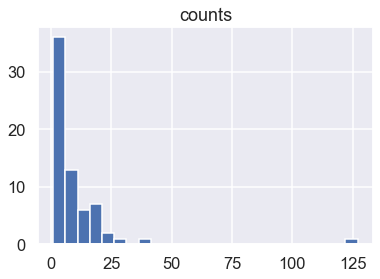

In [23]:
#plot the historgram about the counts
result.hist(column = 'counts', bins = 25)


The zipcode with 125 will potentially be an outlier. This seems to be an area with lots of parks and no housing

#### 2.plot the historgram about the Mediun Sale Price. So we can view the general distribution of zipcode with related to median Sale Price.

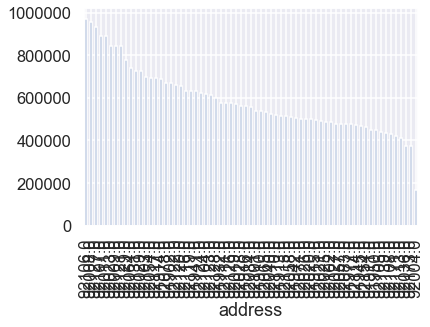

In [24]:
#plot the historgram about the Mediun Sale Price
result.groupby('address')['Median Sale Price'].sum().sort_values(ascending=False).plot(kind='bar')


#### 3.find the relationship between counts and median Sale price

##### 3.1 Using Historgram to see the relationship

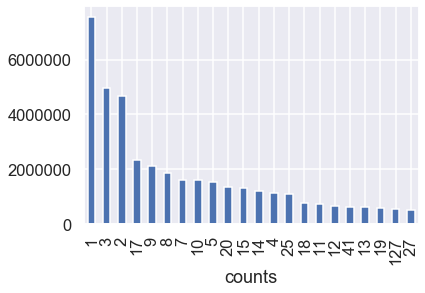

In [25]:
#find the relationship between counts and median Sale price
result.groupby('counts')['Median Sale Price'].sum().sort_values(ascending=False).plot(kind='bar')



##### 3.2 Using Scatterplot will be better to analysis 

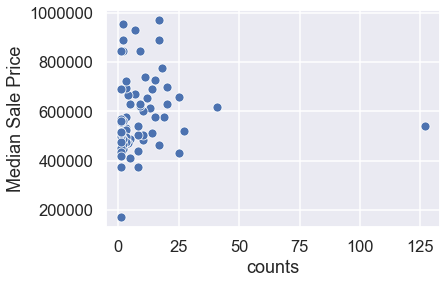

In [26]:
sns.scatterplot(data=result, x="counts", y="Median Sale Price")

##### 3.3 The area with more than 125 parks will be an outlier. This place may have lots of parks and no residence house. So we should get rid of this point


In [27]:
result_no_out=result.drop([0])

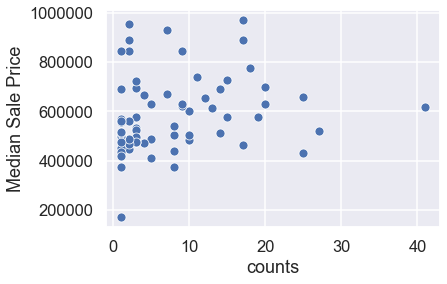

In [28]:
#Plot the scatterplot
sns.scatterplot(data=result_no_out, x="counts", y="Median Sale Price")

##### 3.4 Further remove outliers the one with counts more than 40 will be an outlier,let's see if we delete this

In [29]:
#Drop outliers
result_no_out
result_no_out2 = result_no_out.drop([2])
result_no_out2 

,address,counts,index,Period End,Median Sale Price
5,92110.0,27,8151.0,2019.5,521000.0
6,92108.0,25,7941.0,2019.5,431000.0
7,92122.0,25,9306.0,2019.5,659000.0
8,92103.0,20,7416.0,2019.5,700000.0
9,92116.0,20,8676.0,2019.5,630000.0
...,...,...,...,...,...
96,92004.0,1,2598.0,2019.5,169000.0
98,92139.0,1,10276.0,2019.5,435000.0
99,92171.0,1,10626.0,2019.5,419000.0
101,91913.0,1,755.0,2019.5,515000.0


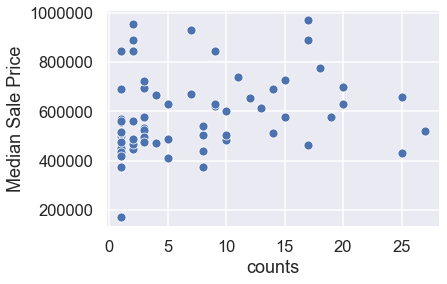

In [30]:
#Plot scatterplots
sns.scatterplot(data=result_no_out2, x="counts", y="Median Sale Price")



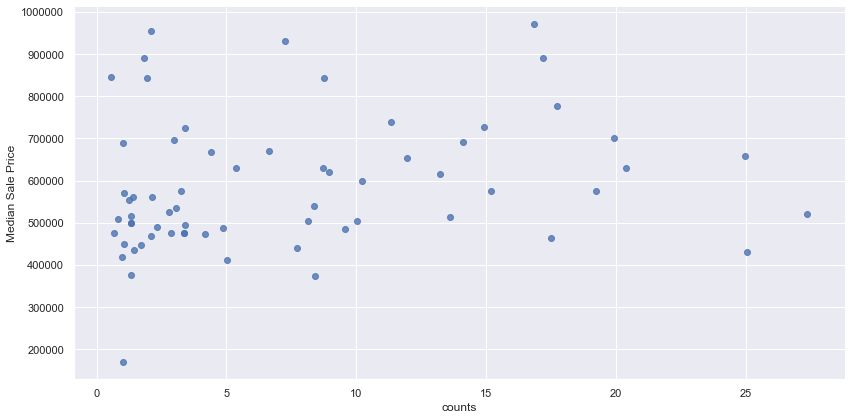

In [33]:
#Increase the size
sns.lmplot(x='counts', y='Median Sale Price', data=result_no_out2, 
           fit_reg=False, height=6, aspect=2, 
           x_jitter=.5, y_jitter=.5);



### This is really hard to see if there is a correlation between the Numbers of park in that zip-code area and the price of housing in that area. 

# Ethics & Privacy

### All of those data are published in Google. The park data is get from The City of San Diego and the house data is get from Red-Fin which is one of the largest housing company in United State. These data are free to use so I think we can use this data for this analysis when I have the citation. 

### Further more, I will need to make sure this process and project is only been seen by authorized people. Since unvail the price of house in different area will cause privacy concern by householders. Everyone don't want others to see the exact price of their own house. 


# Conclusion & Discussion

### By using those two datasets, I finally found that there is a very little negative correlation or non correlation between the number of parks and the medium price of housing in a certain area.  We cannot use the numbers of parks in an area to identify if that area's house is expensive or not. Maybe other factors will affect the housing price like the school district in that area, the environment in that area, the house structure, the size of house, the form of the house and so on and will have nothing related to the number of parks around. 

### For the little negative correlation. To my own thoughts, maybe expensive house have larger yards and people lives there will not needs any parks to enjoy. Also area with more parks are more likely to have lots of tourism, this will made the housing environment noise and maybe house price will be affected. 

### There is some limitation on this projects that the housing price data is just focused on a certain month which may have some bias when getting the conclusion of a general idea. The 2019 May maybe not very representative to the whole situation. 